# Load and explore data

In [64]:
from kloppy import statsbomb
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_columns = None

In [65]:
dataset = statsbomb.load_open_data(event_types=["pass", "shot"])

In [66]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

print(f"{home_team.ground} - {home_team} - {home_team.team_id}")
print(f"{away_team.ground} - {away_team} - {away_team.team_id}")

home - Barcelona - 217
away - Deportivo Alavés - 206


In [67]:
# same for the players
[f"{player} id={player.player_id}" for player in metadata.teams[0].players]

['Malcom Filipe Silva de Oliveira id=3109',
 'Philippe Coutinho Correia id=3501',
 'Sergio Busquets i Burgos id=5203',
 'Jordi Alba Ramos id=5211',
 'Gerard Piqué Bernabéu id=5213',
 'Luis Alberto Suárez Díaz id=5246',
 'Ivan Rakitić id=5470',
 'Ousmane Dembélé id=5477',
 'Samuel Yves Umtiti id=5492',
 'Lionel Andrés Messi Cuccittini id=5503',
 'Nélson Cabral Semedo id=6374',
 'Sergi Roberto Carnicer id=6379',
 'Clément Lenglet id=6826',
 'Rafael Alcântara do Nascimento id=6998',
 'Arturo Erasmo Vidal Pardo id=8206',
 'Jasper Cillessen id=8652',
 'Arthur Henrique Ramos de Oliveira Melo id=11392',
 'Marc-André ter Stegen id=20055']

In [68]:
# metadata to pd DataFrame
dataframe = dataset.to_df(
    "*",  # Get all default columns
    player_name=lambda event: str(event.player),
    team_name=lambda event: str(event.player.team)
)

dataframe.head()

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,player_name,team_name,pass_type,is_counter_attack
0,549567bd-36de-4ac8-b8dc-6b5d3f1e4be8,PASS,COMPLETE,True,1,0 days 00:00:00.575000,0 days 00:00:02.590669,alive,206,206,6581,0.508279,0.500673,0.284626,0.337659,6855,KICK_OFF,LEFT_FOOT,Jonathan Rodríguez Menéndez,Deportivo Alavés,None,None
1,4e4e4cad-9897-43ec-842d-585a4077f6ce,PASS,INCOMPLETE,False,1,0 days 00:00:03.864000,0 days 00:00:07.151421,alive,206,206,6855,0.308299,0.328223,0.716952,0.933853,None,None,RIGHT_FOOT,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés,LONG_BALL,None
2,be27cc25-92b5-4696-b43c-aad957a6119a,PASS,COMPLETE,True,1,0 days 00:00:07.152000,0 days 00:00:08.848529,alive,217,217,5203,0.283048,0.066147,0.294884,0.206900,5470,None,None,Sergio Busquets i Burgos,Barcelona,HIGH_PASS,None
3,b33c0b7f-7456-4efe-b43c-5fd7cbd14689,PASS,COMPLETE,True,1,0 days 00:00:08.848000,0 days 00:00:09.983950,alive,217,217,5470,0.294884,0.206900,0.303565,0.059363,5477,None,HEAD,Ivan Rakitić,Barcelona,HEAD_PASS,None
4,c587e5ce-fe6e-4cfb-b510-8a8e193699d3,PASS,COMPLETE,True,1,0 days 00:00:10.873000,0 days 00:00:11.630764,alive,217,217,5477,0.288571,0.054840,0.217551,0.017526,5211,None,RIGHT_FOOT,Ousmane Dembélé,Barcelona,None,None


In [69]:
dataframe[[
    'event_id', 'event_type', 'result', 'timestamp', 'player_id', 
    'player_name', 'team_name'
]].head()

,event_id,event_type,result,timestamp,player_id,player_name,team_name
0,549567bd-36de-4ac8-b8dc-6b5d3f1e4be8,PASS,COMPLETE,0 days 00:00:00.575000,6581,Jonathan Rodríguez Menéndez,Deportivo Alavés
1,4e4e4cad-9897-43ec-842d-585a4077f6ce,PASS,INCOMPLETE,0 days 00:00:03.864000,6855,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés
2,be27cc25-92b5-4696-b43c-aad957a6119a,PASS,COMPLETE,0 days 00:00:07.152000,5203,Sergio Busquets i Burgos,Barcelona
3,b33c0b7f-7456-4efe-b43c-5fd7cbd14689,PASS,COMPLETE,0 days 00:00:08.848000,5470,Ivan Rakitić,Barcelona
4,c587e5ce-fe6e-4cfb-b510-8a8e193699d3,PASS,COMPLETE,0 days 00:00:10.873000,5477,Ousmane Dembélé,Barcelona


# Pass Events

In [70]:
# Filter only pass events
pass_events = dataframe[dataframe['event_type'] == 'PASS']
pass_events.head()

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,player_name,team_name,pass_type,is_counter_attack
0,549567bd-36de-4ac8-b8dc-6b5d3f1e4be8,PASS,COMPLETE,True,1,0 days 00:00:00.575000,0 days 00:00:02.590669,alive,206,206,6581,0.508279,0.500673,0.284626,0.337659,6855,KICK_OFF,LEFT_FOOT,Jonathan Rodríguez Menéndez,Deportivo Alavés,None,None
1,4e4e4cad-9897-43ec-842d-585a4077f6ce,PASS,INCOMPLETE,False,1,0 days 00:00:03.864000,0 days 00:00:07.151421,alive,206,206,6855,0.308299,0.328223,0.716952,0.933853,None,None,RIGHT_FOOT,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés,LONG_BALL,None
2,be27cc25-92b5-4696-b43c-aad957a6119a,PASS,COMPLETE,True,1,0 days 00:00:07.152000,0 days 00:00:08.848529,alive,217,217,5203,0.283048,0.066147,0.294884,0.206900,5470,None,None,Sergio Busquets i Burgos,Barcelona,HIGH_PASS,None
3,b33c0b7f-7456-4efe-b43c-5fd7cbd14689,PASS,COMPLETE,True,1,0 days 00:00:08.848000,0 days 00:00:09.983950,alive,217,217,5470,0.294884,0.206900,0.303565,0.059363,5477,None,HEAD,Ivan Rakitić,Barcelona,HEAD_PASS,None
4,c587e5ce-fe6e-4cfb-b510-8a8e193699d3,PASS,COMPLETE,True,1,0 days 00:00:10.873000,0 days 00:00:11.630764,alive,217,217,5477,0.288571,0.054840,0.217551,0.017526,5211,None,RIGHT_FOOT,Ousmane Dembélé,Barcelona,None,None


In [71]:
pass_events.columns

Index(['event_id', 'event_type', 'result', 'success', 'period_id', 'timestamp',
       'end_timestamp', 'ball_state', 'ball_owning_team', 'team_id',
       'player_id', 'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'set_piece_type',
       'body_part_type', 'player_name', 'team_name', 'pass_type',
       'is_counter_attack'],
      dtype='object')

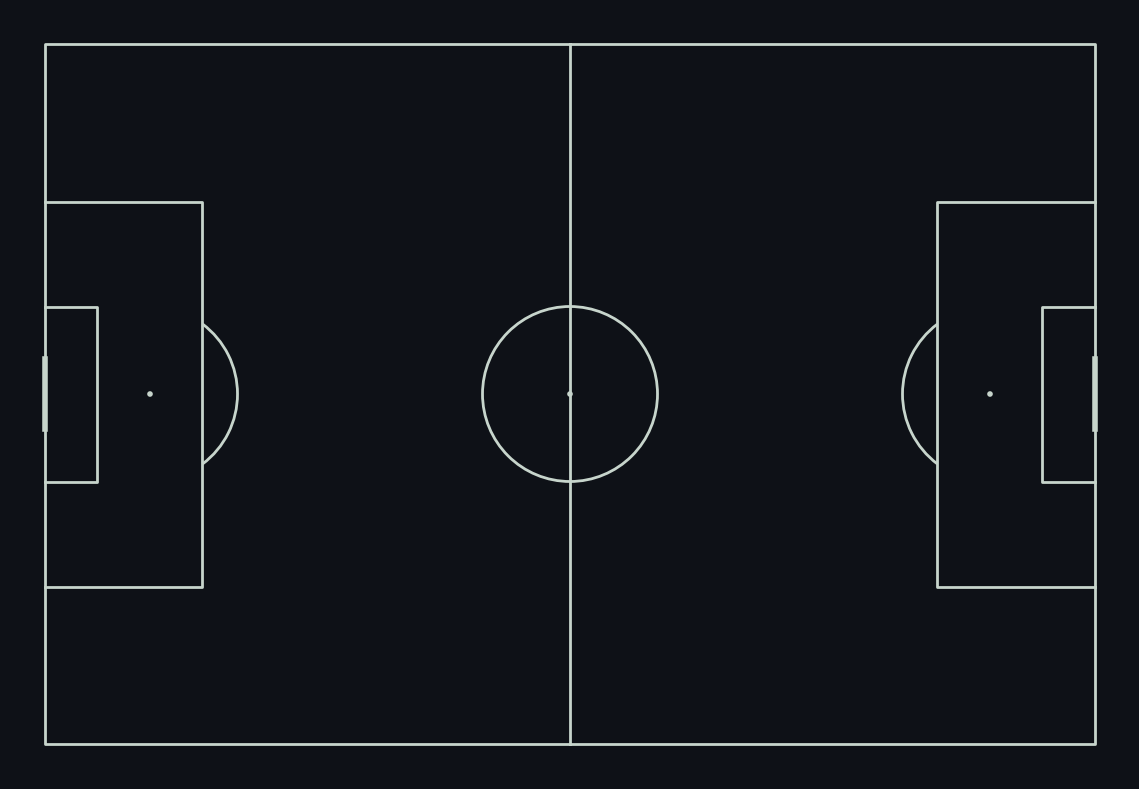

In [72]:
fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#0e1117')
ax.patch.set_facecolor('#0e1117')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#0e1117', line_color='#c7d5cc')
pitch.draw(ax=ax)